# **Part 2: Data Understanding (statistics)**

## **Prepare Environment**

<br/>

### Imports

In [10]:
# Data analysis and data wrangling
import statistics
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.ensemble import RandomForestClassifier  # enbedded method

# Other
from IPython.display import Image
import configparser
import warnings
import pprint
import os

<br/>

### Prepare Principal Directory

In [11]:
def path_to_work(end_directory: str='notebooks'):
    curr_dir = os.path.dirname(os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return f'Change directory to: {curr_dir}'
    
    return f'Current working directory: {curr_dir}'

In [12]:
path_to_work(end_directory='notebooks')

'Current working directory: /home/campos/projects/predict-which-customers-a-call-center-should-contact'

<br/>

### Set Config

In [13]:
# Visualization inside the jupyter
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [17, 12], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 10, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True, 
        rc=rc)
        
# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<br/>

### Load Data

In [14]:
%%time

df_callcenter = pd.read_csv('data/cleansing/callcenter_marketing_clenning.csv', 
                            encoding='utf8',
                            delimiter=',',
                            verbose=True)

Tokenization took: 34.05 ms
Type conversion took: 38.45 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 6.35 ms
Type conversion took: 3.86 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 87.4 ms, sys: 25.2 ms, total: 113 ms
Wall time: 108 ms


**NOTE**: loading in almost half the time compared to the original version of the csv file.

<br/>

### Global Variables

In [15]:
list_columns = []
list_categorical_col = []
list_numerical_col = []

In [17]:
def get_col(df: pd.core.frame.DataFrame, type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns) 
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist()

In [20]:
def get_col_without_target(df: pd.core.frame.DataFrame,
                           list_columns: list,
                           target_col: str) -> list:

    col_target = list_columns.copy()
    
    col_target.remove(target_col)
    print(type(col_target))
    
    return col_target

In [21]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])
list_without_target_col = get_col_without_target(df=df_callcenter,
                                                 list_columns=list_columns,
                                                 target_col='resultado')

Dataframe not contains <class 'object'> columns !
<class 'list'>


---

## **Split Data**
From the **target** I will split the dataset to analyze it statistically.
- `resultado == sim`
- `resultado == nao`

In [22]:
df_resultado_0 = df_callcenter.query('resultado == 0')
df_resultado_0.head()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
0,56,0,0,0,0,0,0,0,5,1,5,0,0,0,0,93.99,-36.40,4.86,5191,0
1,57,1,0,1,0,0,0,0,5,1,5,0,0,0,0,93.99,-36.40,4.86,5191,0
2,37,1,0,1,0,1,0,0,5,1,5,0,0,0,0,93.99,-36.40,4.86,5191,0
3,40,2,0,2,0,0,0,0,5,1,5,0,0,0,0,93.99,-36.40,4.86,5191,0
4,56,1,0,1,0,0,1,0,5,1,5,0,0,0,0,93.99,-36.40,4.86,5191,0


In [23]:
df_resultado_1 = df_callcenter.query('resultado == 1')
df_resultado_1.head()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
75,41,3,2,0,0,1,0,0,5,1,7,0,0,0,0,93.99,-36.40,4.86,5191,1
83,49,10,0,6,0,1,0,0,5,1,6,0,0,0,0,93.99,-36.40,4.86,5191,1
88,49,4,0,3,0,0,0,0,5,1,7,0,0,0,0,93.99,-36.40,4.86,5191,1
129,41,4,0,4,0,1,0,0,5,1,6,0,0,0,0,93.99,-36.40,4.86,5191,1
139,45,3,0,3,0,1,0,0,5,1,6,0,0,0,0,93.99,-36.40,4.86,5191,1


---

## **Descriptive Statistics**
- Central Trend Measures
- Shape Measures
- Dispersion Measures
- Relation Measures

In [25]:
df_callcenter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        41170 non-null  int64  
 1   profissao                    41170 non-null  int64  
 2   estado_civil                 41170 non-null  int64  
 3   educacao                     41170 non-null  int64  
 4   inadimplente                 41170 non-null  int64  
 5   emprestimo_moradia           41170 non-null  int64  
 6   emprestimo_pessoal           41170 non-null  int64  
 7   meio_contato                 41170 non-null  int64  
 8   mes                          41170 non-null  int64  
 9   dia_da_semana                41170 non-null  int64  
 10  duracao                      41170 non-null  int64  
 11  qtd_contatos_campanha        41170 non-null  int64  
 12  dias_ultimo_contato          41170 non-null  int64  
 13  qtd_contatos_tot

<br/>

### Central Trend Measures

In [26]:
def show_measures_location(df: pd.core.frame.DataFrame, type_descr: list) -> None:
    """
    Function get measures localization
    Handler when type data not exists
    
    Args:
    type_descr
        np.number, np.object  -> return summary statistic with all columns
        np.number             -> return summary statistic numerical columns 
        np.object             -> return summary statistic object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n\n')    
    else:
        list_col = col.tolist()
        percentage = (len(list_col) / df.shape[1]) * 100
        
        print("-"*25, "MEASURES OF LOCALIZATION", "-"*25, end='\n\n')
        print(f"TOTAL columns {type_descr}: {len(list_col)}")
        print("PERCENTAGE {} in dataframe: {:3.4} %".format(type_descr, percentage))
        
        return df.describe(include=type_descr)

In [27]:
show_measures_location(df=df_callcenter,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 20
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00,41170.00
mean,40.02,3.62,0.50,3.32,0.00,0.55,0.15,0.63,6.61,2.98,4.67,0.36,0.22,0.17,0.17,93.58,-40.50,3.62,5166.85,0.11
std,10.42,2.41,0.69,2.23,0.02,0.50,0.36,0.48,2.04,1.41,0.96,0.58,1.35,0.49,0.46,0.58,4.63,1.73,72.33,0.32
min,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,92.20,-50.80,0.63,4963.00,0.00
25%,32.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,5.00,2.00,4.00,0.00,0.00,0.00,0.00,93.08,-42.70,1.34,5099.00,0.00
50%,38.00,3.00,0.00,3.00,0.00,1.00,0.00,1.00,6.00,3.00,5.00,0.00,0.00,0.00,0.00,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,4.00,1.00,6.00,0.00,1.00,0.00,1.00,8.00,4.00,5.00,1.00,0.00,0.00,0.00,93.99,-36.40,4.96,5228.00,0.00
max,98.00,11.00,2.00,7.00,2.00,1.00,1.00,1.00,12.00,5.00,8.00,4.00,27.00,7.00,2.00,94.77,-26.90,5.04,5228.00,1.00


In [28]:
show_measures_location(df=df_resultado_0,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 20
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00,36531.00
mean,39.91,3.57,0.50,3.28,0.00,0.55,0.15,0.61,6.58,2.97,4.56,0.38,0.09,0.13,0.13,93.60,-40.59,3.81,5176.00,0.00
std,9.90,2.37,0.69,2.22,0.02,0.50,0.36,0.49,1.99,1.42,0.92,0.59,0.90,0.41,0.37,0.56,4.39,1.64,64.62,0.00
min,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,92.20,-50.80,0.63,4963.00,0.00
25%,32.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,5.00,2.00,4.00,0.00,0.00,0.00,0.00,93.08,-42.70,1.41,5099.00,0.00
50%,38.00,3.00,0.00,3.00,0.00,1.00,0.00,1.00,6.00,3.00,5.00,0.00,0.00,0.00,0.00,93.92,-41.80,4.86,5195.00,0.00
75%,47.00,4.00,1.00,6.00,0.00,1.00,0.00,1.00,8.00,4.00,5.00,1.00,0.00,0.00,0.00,93.99,-36.40,4.96,5228.00,0.00
max,95.00,11.00,2.00,7.00,2.00,1.00,1.00,1.00,12.00,5.00,8.00,4.00,22.00,7.00,2.00,94.77,-26.90,5.04,5228.00,0.00


In [29]:
show_measures_location(df=df_resultado_1,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 20
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00,4639.00
mean,40.91,4.00,0.55,3.61,0.00,0.56,0.15,0.83,6.82,3.02,5.57,0.26,1.23,0.49,0.52,93.35,-39.79,2.12,5094.81,1.00
std,13.84,2.71,0.67,2.29,0.00,0.50,0.35,0.38,2.40,1.37,0.75,0.47,2.94,0.86,0.80,0.68,6.14,1.74,87.74,0.00
min,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,3.00,0.00,0.00,0.00,0.00,92.20,-50.80,0.63,4963.00,1.00
25%,31.00,2.00,0.00,1.00,0.00,0.00,0.00,1.00,5.00,2.00,5.00,0.00,0.00,0.00,0.00,92.89,-46.20,0.85,5017.00,1.00
50%,37.00,3.00,0.00,4.00,0.00,1.00,0.00,1.00,7.00,3.00,6.00,0.00,0.00,0.00,0.00,93.20,-40.40,1.27,5099.00,1.00
75%,50.00,5.00,1.00,6.00,0.00,1.00,0.00,1.00,8.00,4.00,6.00,0.00,0.00,1.00,1.00,93.92,-36.10,4.41,5191.00,1.00
max,98.00,11.00,2.00,7.00,0.00,1.00,1.00,1.00,12.00,5.00,8.00,3.00,27.00,6.00,2.00,94.77,-26.90,5.04,5228.00,1.00


**NOTES**
<br/>
- Something interesting to note is that when we only have the dataset with a positive result, the value of the `inadimplete` feature is always the same.
- I'll continue explore this feature.

#### Feature: `inadimplete`

In [30]:
df_resultado_1['inadimplente'].unique()

array([0])

In [31]:
df_callcenter['inadimplente'].unique()

array([0, 2])

In [32]:
len(df_callcenter.query('inadimplente == 2'))

3

- Where there is`resultado == POSITIVO` the client are **not** defaulted.
- So we can conclude that it is not necessary to call customers who are in default.

##### Hypothesis
- **Hypothesis:** if feature `inadimplente == 2`, than `qtd_contatos_campanha == 0`
  - if valid hypothesis, means there is wasted time calling non-defaulting customers, so it's **outliers** data and should be removed.

In [33]:
df_hipotese = df_callcenter.query('inadimplente == 2 & qtd_contatos_campanha == 0')
len(df_hipotese)

3

- **Valideted hypothesis**
  - In the entire dataframe there are only 3 defaulters
  - The data are remove

In [34]:
print(f'Rows before operation = {df_callcenter.shape[0]}')

df_callcenter.drop(df_hipotese.index, inplace=True)

print(f'Rows after operation = {df_callcenter.shape[0]}')

Rows before operation = 41170
Rows after operation = 41167


<br/>

### Shape Measures
- Show the form of data distribution
- Identification of variable distributions

#### Data Asymmetry (skew)
The closer it is to 0, the better (normal distribution).

In [36]:
#  At this point I decided to use dataframe to maintain the same function pattern df.describe()
# However, dictionnaires are more recommended because they are faster in a few data.

def show_measures_shape(df: pd.core.frame.DataFrame, *columns: 'list') -> pd.core.frame.DataFrame:
    index = ['skew', 'kurtosis'] 
    df_temp = pd.DataFrame(index=[index])
        
    print("-"*25, "MEASURES OF SHAPE", "-"*25, end='\n')
    
    for column in columns:
        list_temp = []
                
        list_temp.append(df[column].skew())
        list_temp.append(df[column].kurt())
        
        df_temp[column] = list_temp
    
    return df_temp

In [37]:
show_measures_shape(df_callcenter, *list_numerical_col)

------------------------- MEASURES OF SHAPE -------------------------


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
skew,0.78,1.32,1.01,-0.01,0,-0.19,1.94,-0.56,0.85,0.00,-0.36,1.47,7.94,3.83,2.74,-0.22,0.30,-0.71,-1.05,2.45
kurtosis,0.79,1.46,-0.26,-1.51,0,-1.96,1.77,-1.69,-0.03,-1.30,0.71,1.77,76.36,20.10,6.82,-0.83,-0.36,-1.41,0.01,4.00


#### Plot

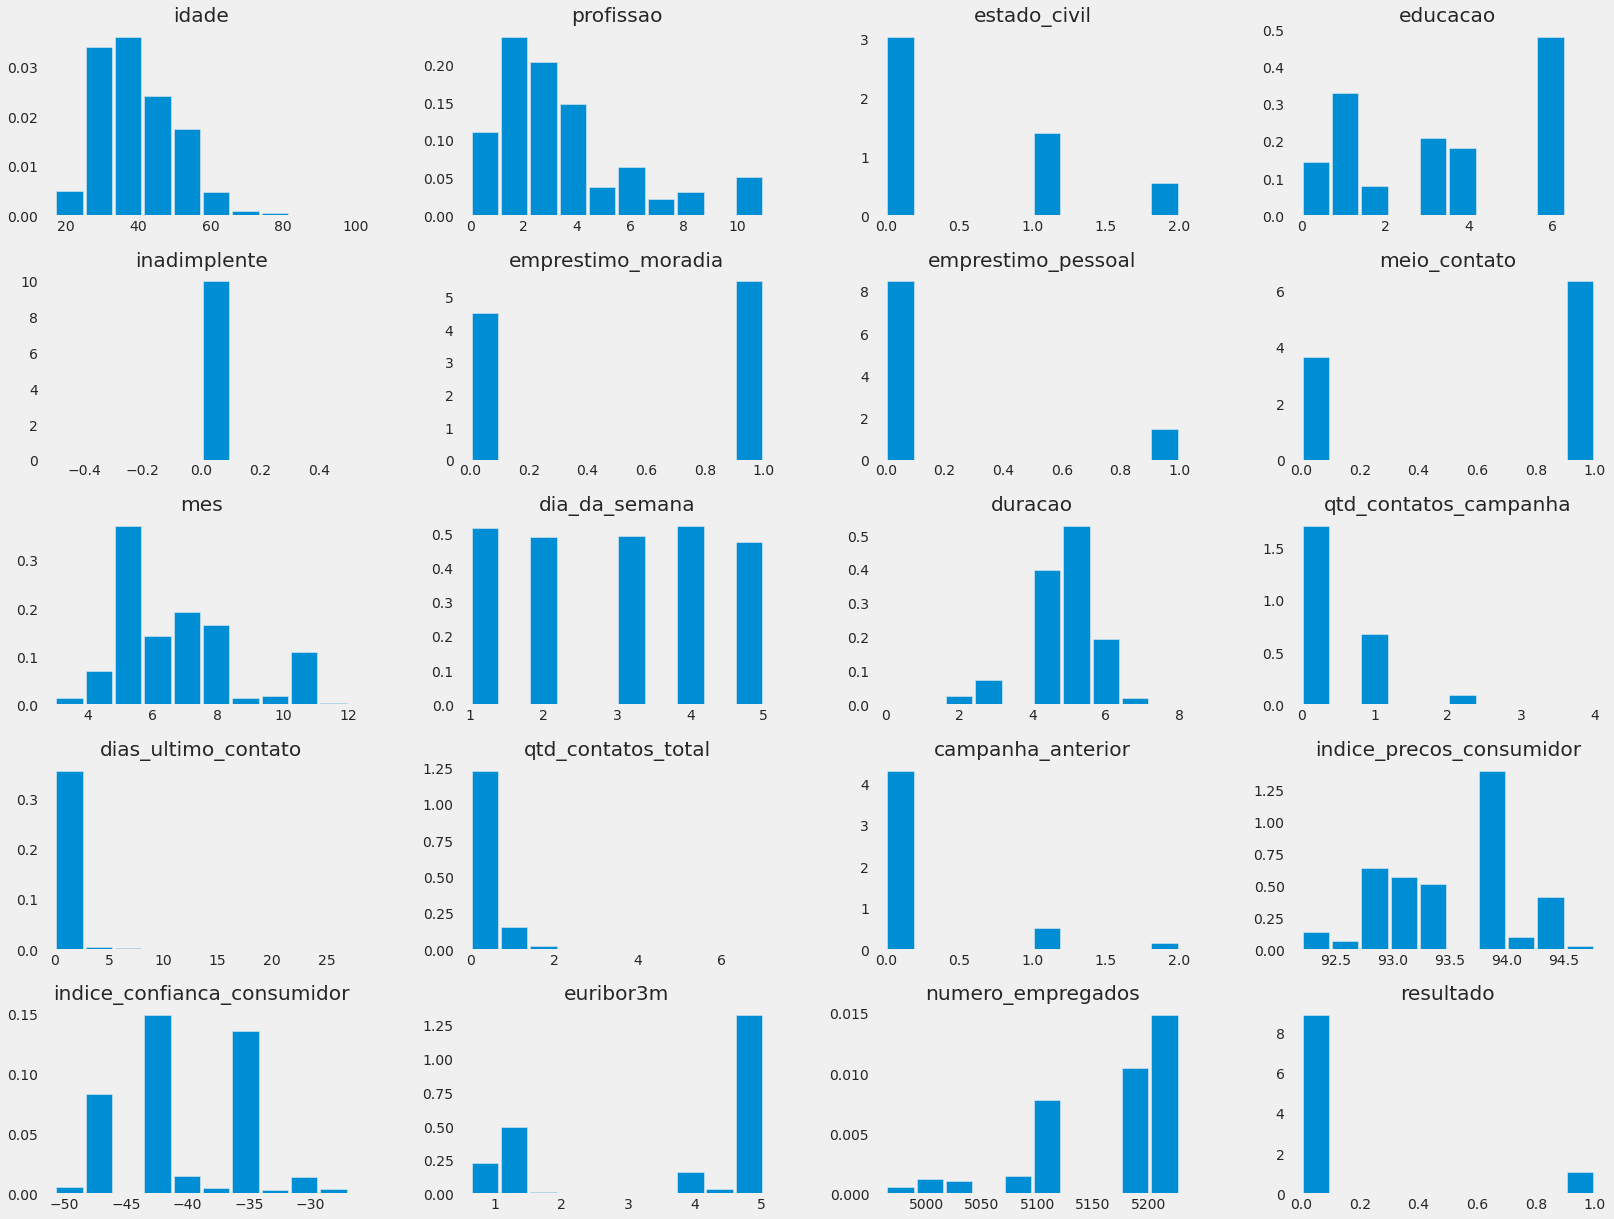

In [46]:
# Distribuition
hist = df_callcenter[list_numerical_col].hist(figsize=[25,20],
                                              density=True, 
                                              bins=10, 
                                              grid=False, 
                                              zorder=2, 
                                              rwidth=0.9)
hist;

**NOTES**
- Observing the generated dataframe, it is possible to notice that some features are far from a normal distribution. This is the case of: `inadimplente`, `dias_ultimo_contato` and `qtd_contatos_total`.
- Kurtose also presents very different values in :`inadimplente`, `dias_ultimo_contato` and `qtd_contatos_total`.
- The `inadimplente` feature comes from yes and no values, for this reason it gave such a discrepant value.
- It is necessary to **reanalyze** the cleaning process `dias_ultimo_contato` and `qtd_contatos_total`.

<!-- 
- Observando o dataframe gerado é possível notar que algumas features estão muito longe de uma distribuição normal. É o caso de: `inadimplente`, `dias_ultimo_contato` e `qtd_contatos_total`.
- A kurtose tambe apresenta valores muito discrepantes em :`inadimplente`, `dias_ultimo_contato` e `qtd_contatos_total`.
- A feature `inadimplente` é provinda de valores sim e não, por este motivo deu um valor tão discrepânte.
- Cabe **reanalisar** o processo de limpeza `dias_ultimo_contato` e `qtd_contatos_total`. -->

In [40]:
# reanalyze

list_col_reanalyze = ['dias_ultimo_contato','qtd_contatos_total']

- Simulating um **rescale**

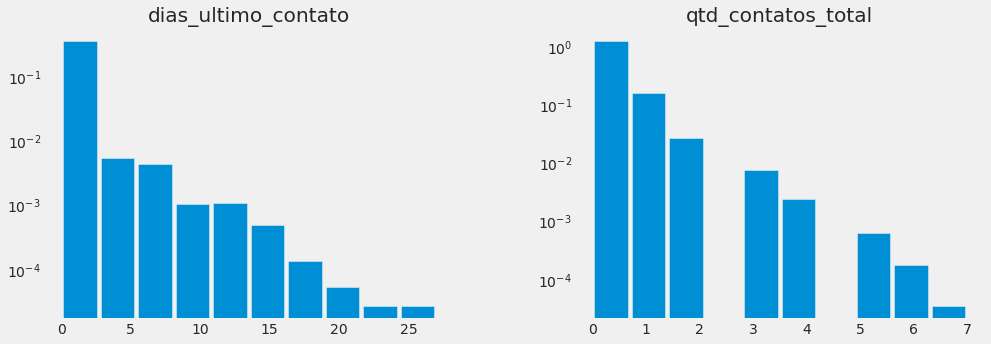

In [47]:
hist = df_callcenter[list_col_reanalyze].hist(figsize=[15,5],
                                       density=True, 
                                       bins=10, 
                                       grid=False, 
                                       zorder=2, 
                                       rwidth=0.9,
                                       log=True)
hist;

#### Notes on Reanalysis
- When simulating a log application in order to bring the features closer to a Gaussian distribution, there was a big visual difference in the distribution.
- For these variables, the technique of **rescale**

#### `dias_ultimo_contato` and `qtd_contatos_total`
- Much column data `dias_ultimo_contato` and `qtd_contatos_total` are zeros, so it is necessary to add a correction for these.
- This correction guarantees that the data will not tend to infinity, because **log 0 = undefined**
- The ideal is to apply to the value 0, **log 1 = 0** or to give more weight log 2.

In [71]:
def apply_log(df: pd.core.frame.DataFrame,
              fix: int = 0,
              type_col: 'number' = 'int16',
              column: str = None):
    
    skew_before = df[column].skew()
    
    df[column] = [np.log(x + fix).astype(type_col) for x in df[column]]
    
    skew_after = df[column].skew()
    
    return f'Skew before = {skew_before} -> Skew after = {skew_after}'

In [30]:
apply_log(df = df_callcenter,
          fix = 2,
          type_col = 'int16',
          column = 'qtd_contatos_total')

'Skew before = 3.8313158687466706 -> Skew after = 2.125168815715544'

In [31]:
apply_log(df = df_callcenter,
          fix = 2,
          type_col = 'int16',
          column = 'dias_ultimo_contato')

'Skew before = 7.937427748212724 -> Skew after = 5.702686547673782'

<br/>

### Dispersion Measures

In [51]:
def show_measures_spread(df: pd.core.frame.DataFrame, *columns: 'list') -> pd.core.frame.DataFrame:
    index = ['std_deviation_pop',
            'std_deviation',
             'variance_pop',
             'variance',
             'maximum',
             'minimum'] 

    df_temp = pd.DataFrame(index=[index])
    
    print("-"*25, "MEASURES OF SPREAD", "-"*25, end='\n\n')
    
    for column in columns:
        list_temp = []
                
        list_temp.append(statistics.pstdev(df[column])) # population
        list_temp.append(statistics.stdev(df[column])) # sample
        list_temp.append(statistics.pvariance(df[column])) # population
        list_temp.append(statistics.variance(df[column])) # sample
        list_temp.append(df[column].max())
        list_temp.append(df[column].min())
        
        df_temp[column] = list_temp
    
    return df_temp

In [52]:
show_measures_spread(df_callcenter, *list_numerical_col)

------------------------- MEASURES OF SPREAD -------------------------



,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
std_deviation_pop,10.42,2.41,0.69,2.23,0.00,0.50,0.36,0.48,2.04,1.41,0.96,0.58,1.35,0.49,0.46,0.58,4.63,1.73,72.33,0.32
std_deviation,10.42,2.41,0.69,2.23,0.00,0.50,0.36,0.48,2.04,1.41,0.96,0.58,1.35,0.49,0.46,0.58,4.63,1.73,72.33,0.32
variance_pop,108.58,5.82,0.47,4.96,0.00,0.25,0.13,0.23,4.17,1.99,0.92,0.33,1.82,0.25,0.21,0.34,21.42,3.01,5231.75,0.10
variance,108.59,5.82,0.47,4.96,0.00,0.25,0.13,0.23,4.17,1.99,0.92,0.33,1.82,0.25,0.21,0.34,21.42,3.01,5231.88,0.10
maximum,98.00,11.00,2.00,7.00,0.00,1.00,1.00,1.00,12.00,5.00,8.00,4.00,27.00,7.00,2.00,94.77,-26.90,5.04,5228.00,1.00
minimum,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,92.20,-50.80,0.63,4963.00,0.00


<br/>

### Relation Measures

In [53]:
df_callcenter.corr()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
idade,1.00,0.02,-0.12,-0.08,NaN,-0.00,-0.01,-0.01,0.08,-0.02,0.01,-0.00,0.02,0.02,0.03,0.00,0.13,0.01,-0.02,0.03
profissao,0.02,1.00,-0.00,0.17,NaN,0.01,-0.01,0.02,0.06,0.00,0.01,-0.02,0.04,0.05,0.05,-0.05,0.01,-0.08,-0.09,0.06
estado_civil,-0.12,-0.00,1.00,0.06,NaN,0.01,-0.00,0.04,-0.00,-0.00,-0.00,0.01,0.02,0.03,0.03,-0.02,-0.05,-0.05,-0.05,0.03
educacao,-0.08,0.17,0.06,1.00,NaN,0.02,0.01,0.09,0.11,0.01,-0.02,0.00,0.03,0.02,0.03,-0.08,0.07,-0.02,-0.03,0.05
inadimplente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emprestimo_moradia,-0.00,0.01,0.01,0.02,NaN,1.00,0.04,0.08,0.03,-0.01,-0.01,-0.01,0.00,0.02,0.02,-0.08,-0.03,-0.06,-0.05,0.01
emprestimo_pessoal,-0.01,-0.01,-0.00,0.01,NaN,0.04,1.00,0.01,-0.00,0.00,-0.01,0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,0.00,-0.00
meio_contato,-0.01,0.02,0.04,0.09,NaN,0.08,0.01,1.00,0.32,-0.02,0.05,-0.07,0.10,0.21,0.23,-0.59,-0.25,-0.40,-0.27,0.14
mes,0.08,0.06,-0.00,0.11,NaN,0.03,-0.00,0.32,1.00,-0.01,-0.03,-0.03,0.06,0.06,0.06,-0.15,0.26,0.16,0.13,0.04
dia_da_semana,-0.02,0.00,-0.00,0.01,NaN,-0.01,0.00,-0.02,-0.01,1.00,-0.02,0.00,-0.01,0.00,0.00,-0.00,0.00,-0.01,-0.00,0.01


In [56]:
def plot_correlation(df):
    plt.figure(figsize = (25,20))
    plt.title('Correlation Features', y=1.00, size=45)

    correlation = df.corr(method='pearson')
    
    correlation_img = sns.heatmap(correlation, 
                                    annot=True, 
                                    cbar=True, 
                                    linecolor='white',
                                    linewidths=.1,
                                    cmap="RdYlGn")
    plt.autoscale()

    return correlation_img

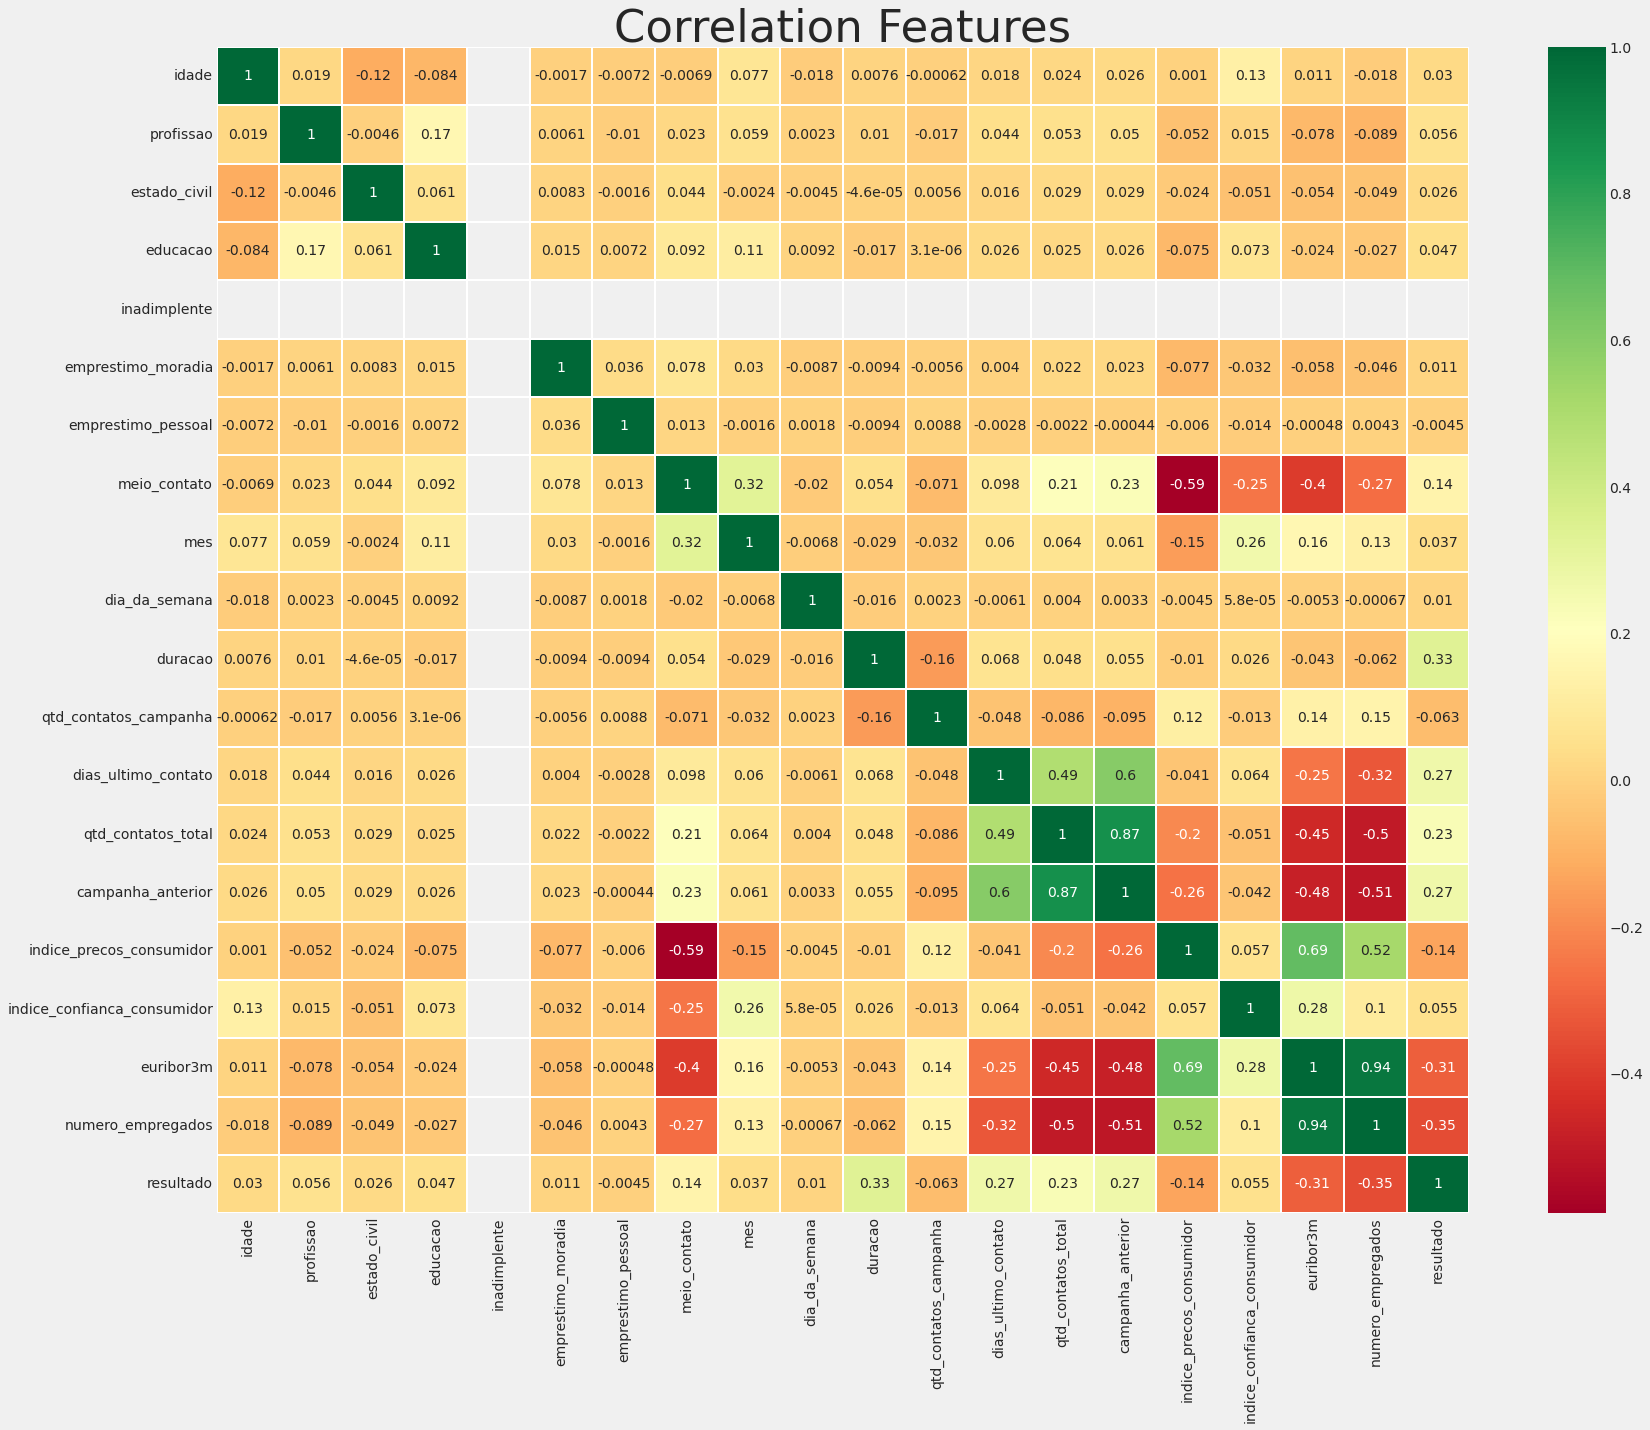

In [57]:
correlation_img = plot_correlation(df_callcenter)

- The column `inadimplente` It is null because every shhow same value

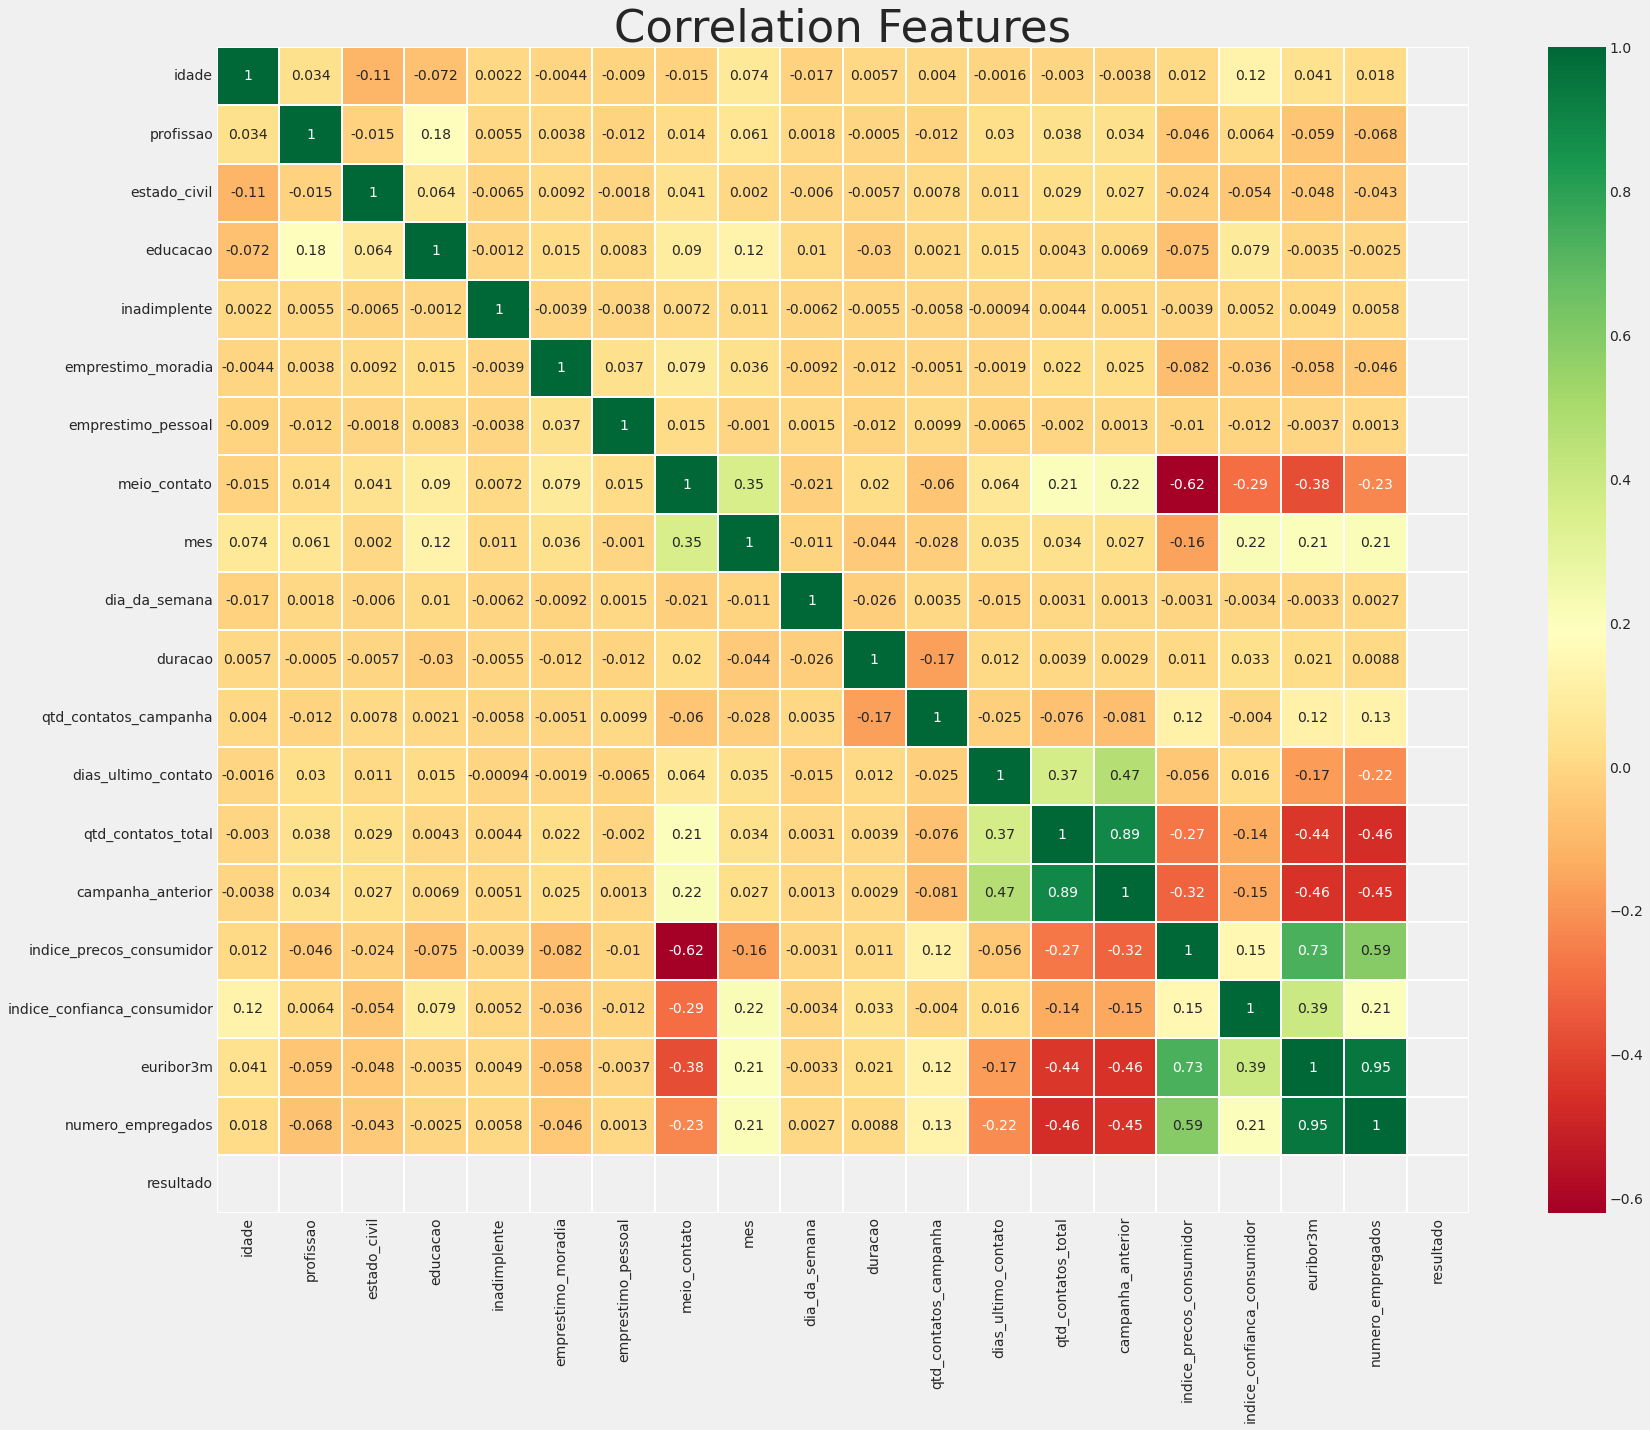

In [58]:
correlation_resultado_0_img = plot_correlation(df_resultado_0)

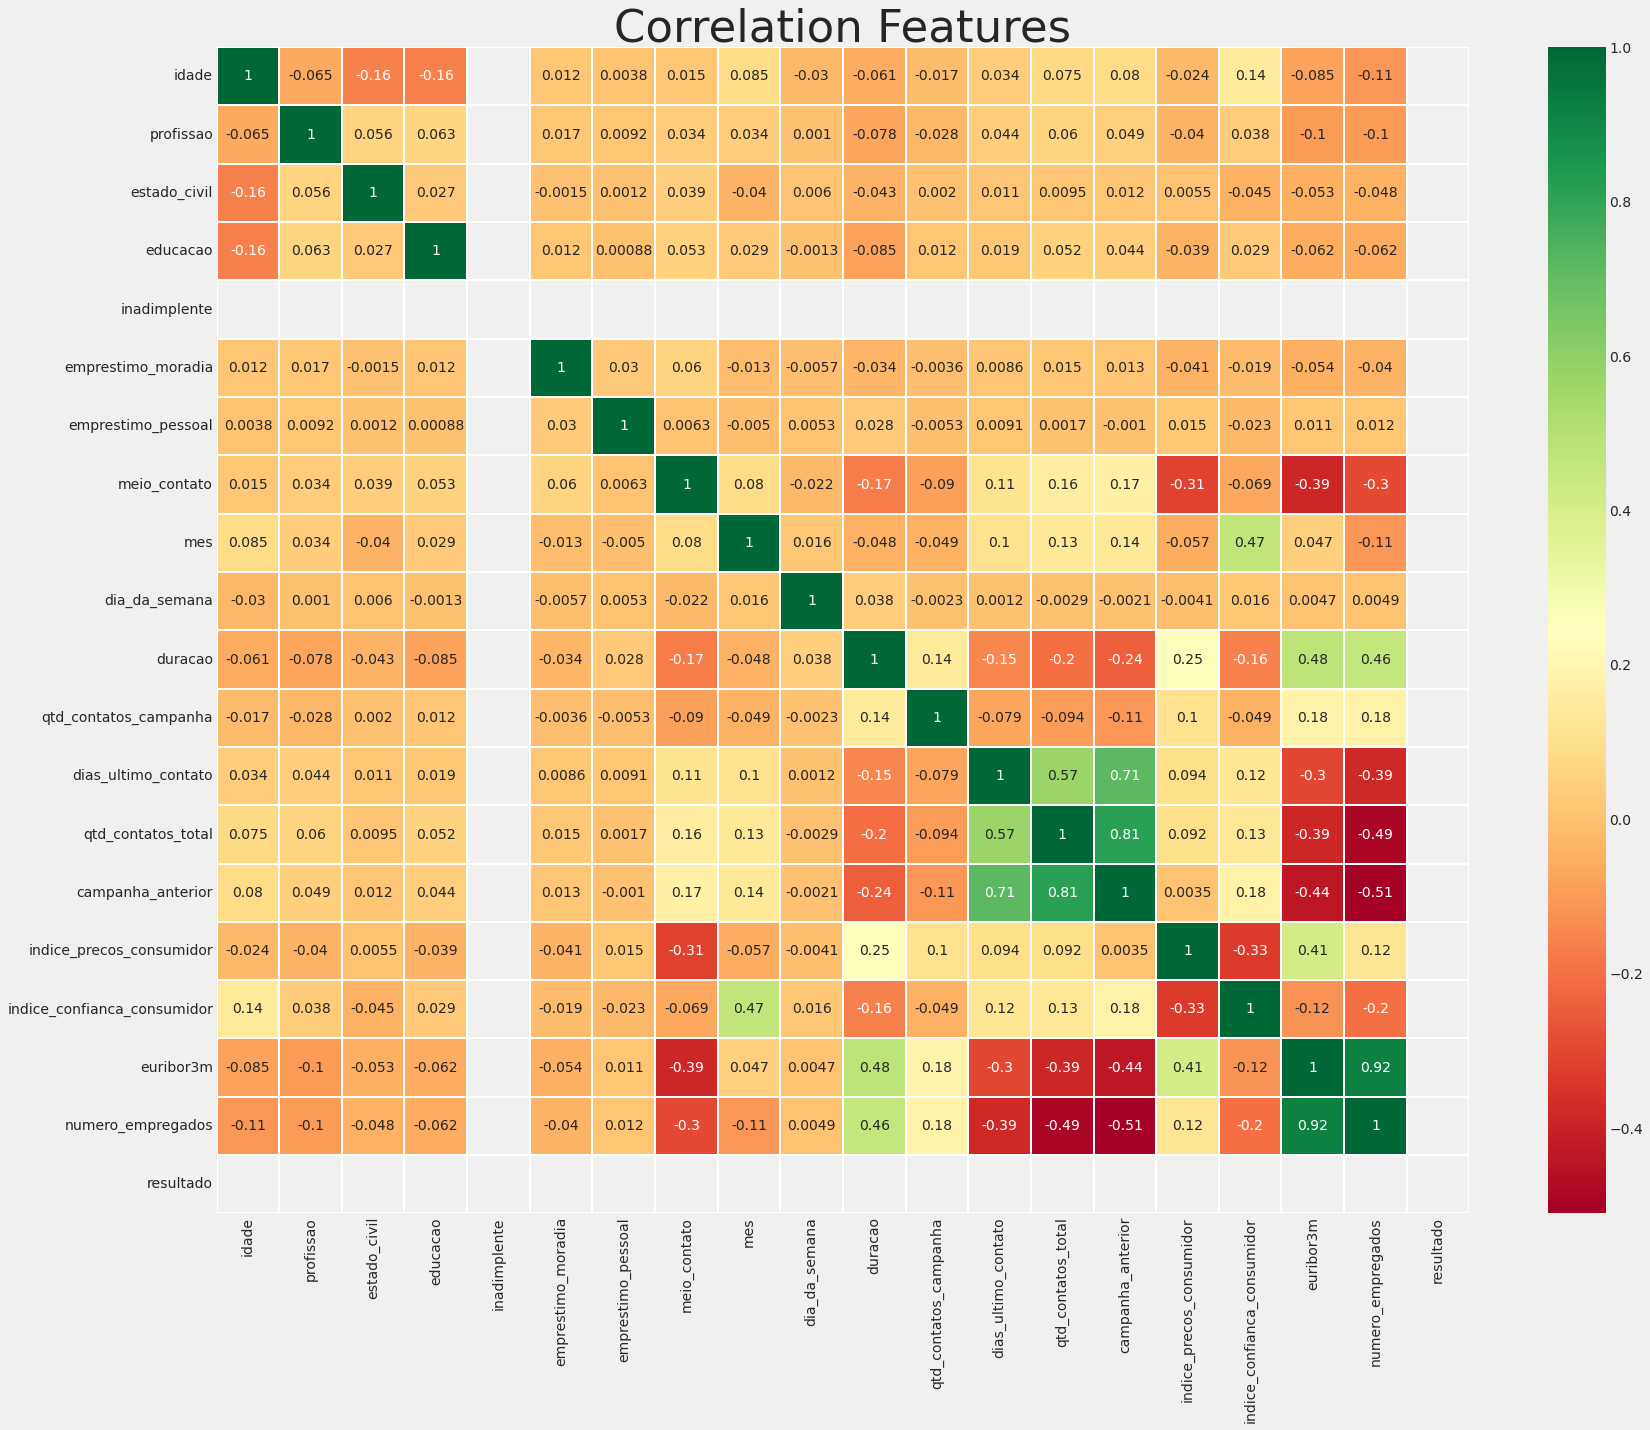

In [59]:
correlation_resultado_1_img = plot_correlation(df_resultado_1)

**NOTE**
<br/>
The image contains a lot of details. Better to analyze outside the notebook jupyter

In [60]:
# savefig()

def save_image(img: 'matplotlib',
               name: str,
               path: str = 'reports/images/'):
    
    fig = img.get_figure()
    fig.savefig(f"reports/images/{name}.png")
    
    return f"Image {name} saved."

In [61]:
save_image(img=correlation_img, name='correlation')

'Image correlation saved.'

In [62]:
save_image(img=correlation_resultado_0_img, name='correlation_resultado_0')

'Image correlation_resultado_0 saved.'

In [63]:
save_image(img=correlation_resultado_1_img, name='correlation_resultado_1')

'Image correlation_resultado_1 saved.'

#### Scatter Plot
I will print scatter graphics joins with feature groups as provided in the file `callcenter_descricao.txt`

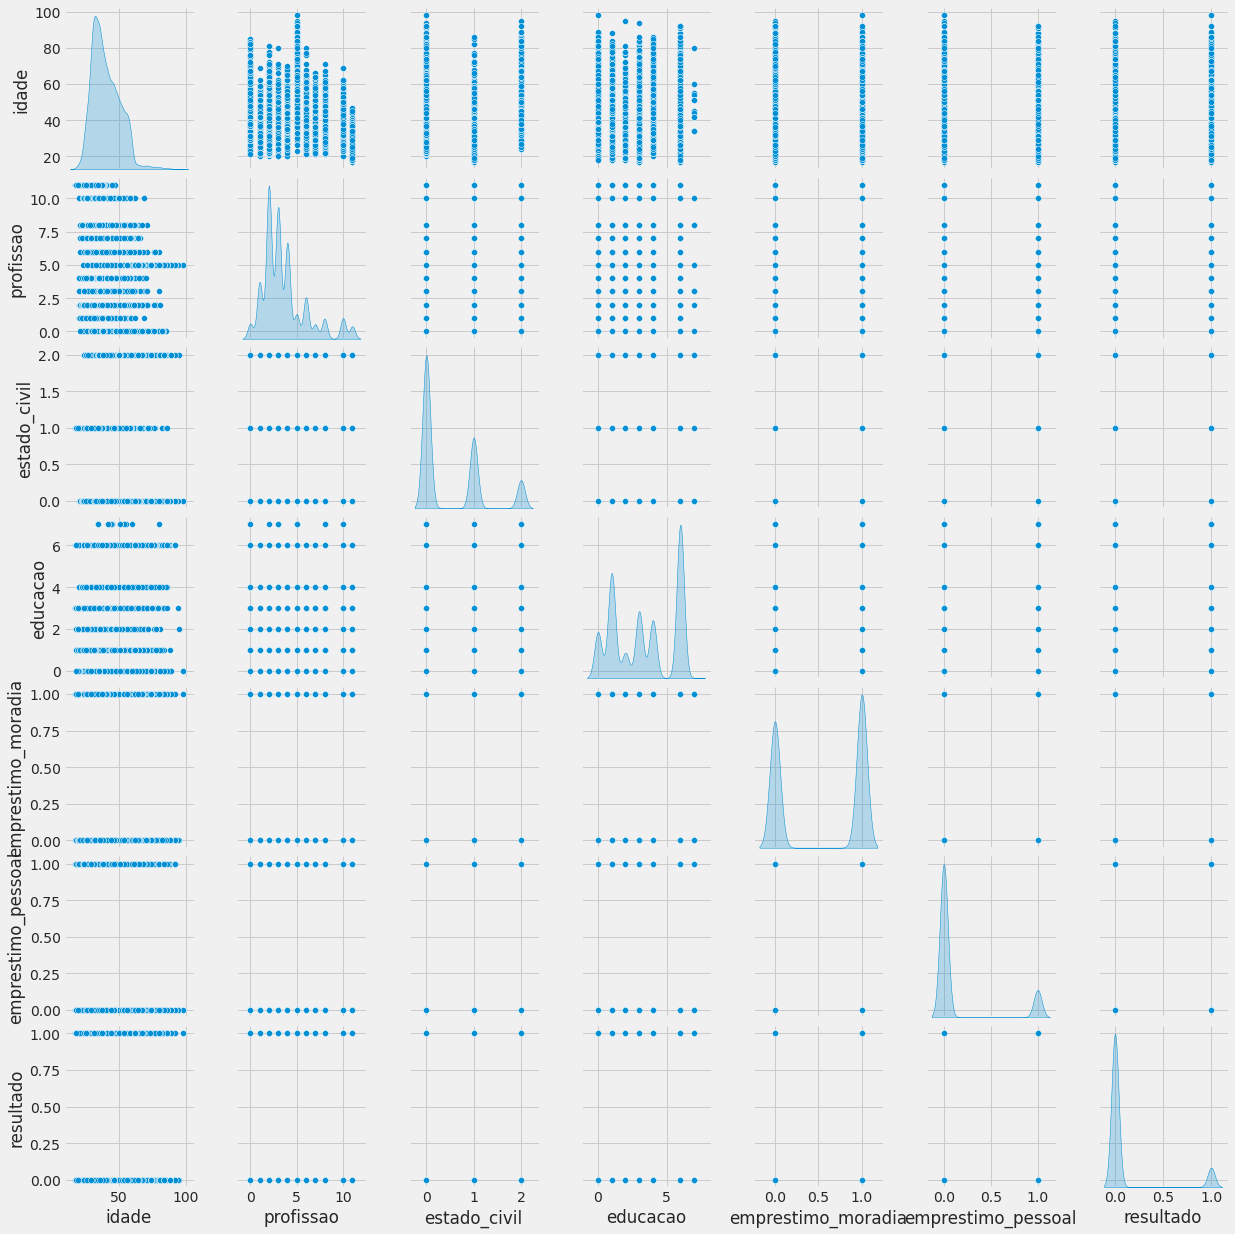

In [65]:
corr_client_data = sns.pairplot(df_callcenter[list_numerical_col], 
                                vars=['idade',
                                      'profissao',
                                      'estado_civil',
                                      'educacao',
                                      'emprestimo_moradia',
                                      'emprestimo_pessoal',
                                      'resultado'],
                                 kind = 'scatter',
                                 diag_kind='kde')
corr_client_data;

**NOTES**
<br/>
There are no visible correlations between the features and the target variable.

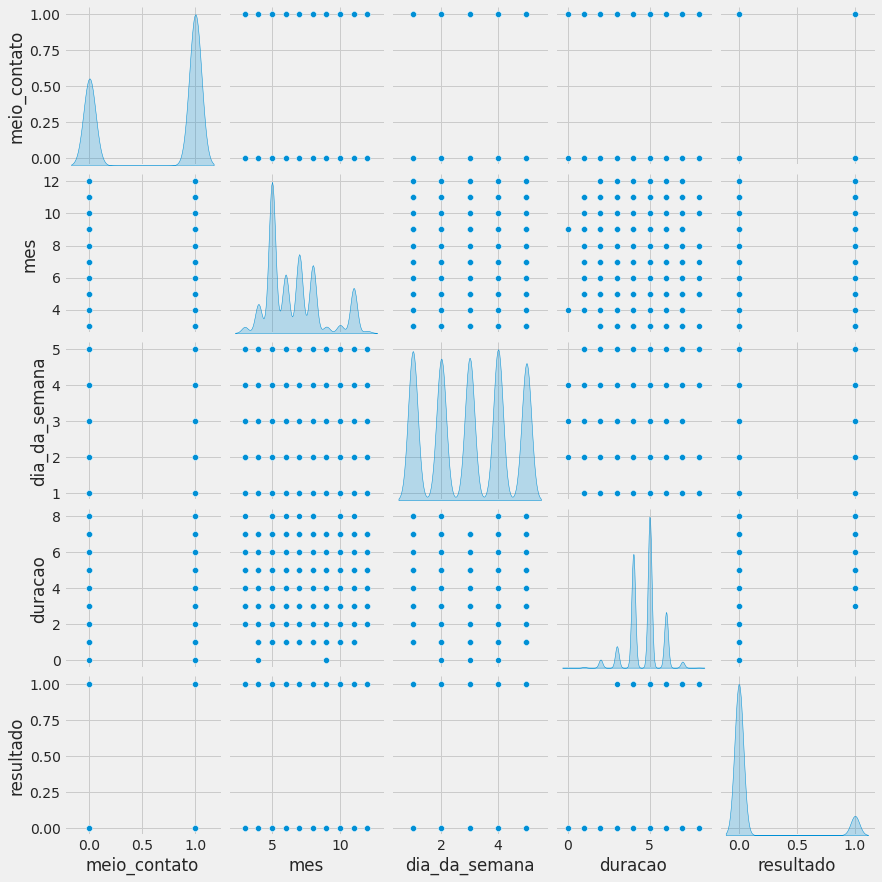

In [67]:
corr_last_contact = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['meio_contato',
                                             'mes',
                                             'dia_da_semana',
                                             'duracao',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
corr_last_contact;

**NOTES**
There are no visible correlations between the features and the target variable.

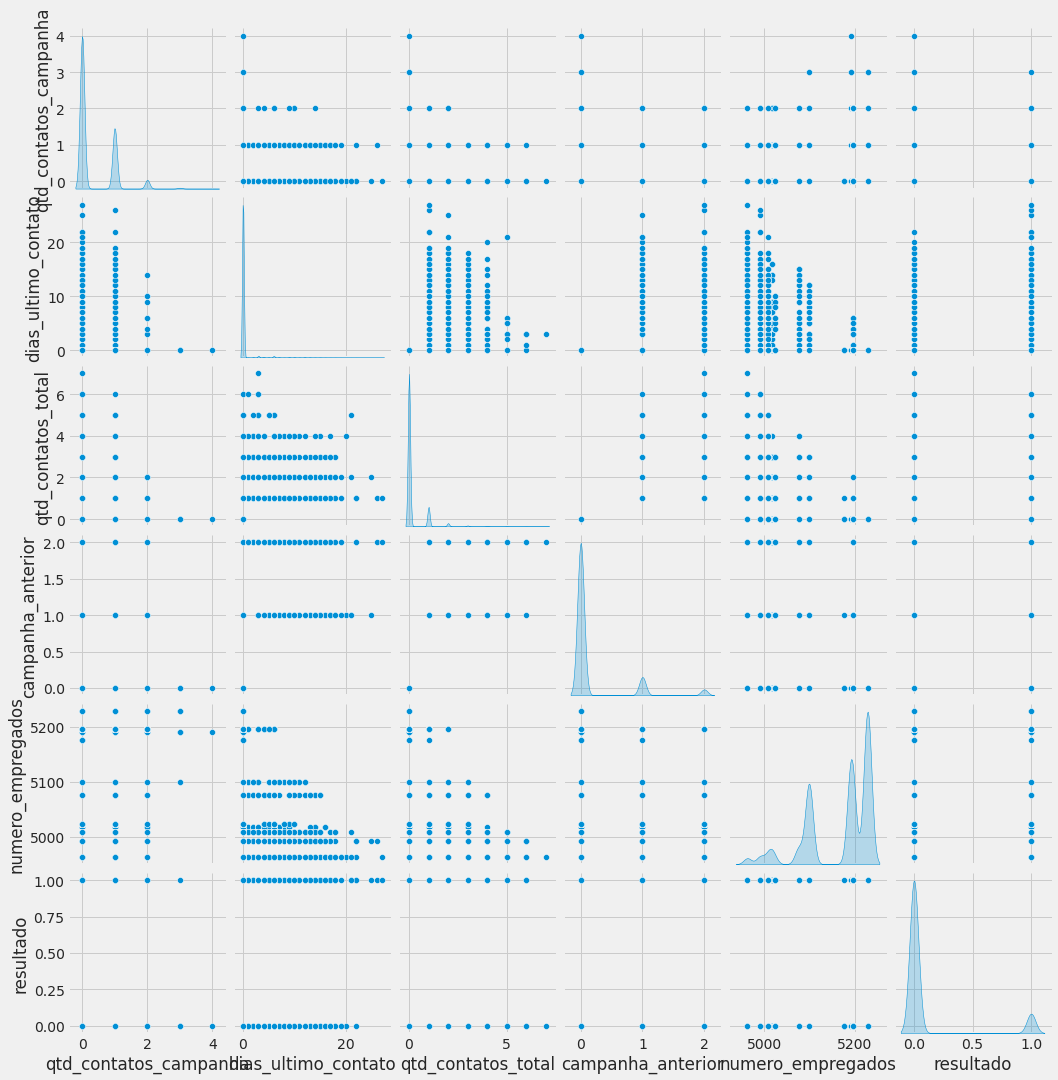

In [68]:
corr_other_var = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['qtd_contatos_campanha',
                                             'dias_ultimo_contato',
                                             'qtd_contatos_total',
                                             'campanha_anterior',
                                             'numero_empregados',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
corr_other_var;

**NOTES**
<br/>
There are no visible correlations between the features and the target variable.

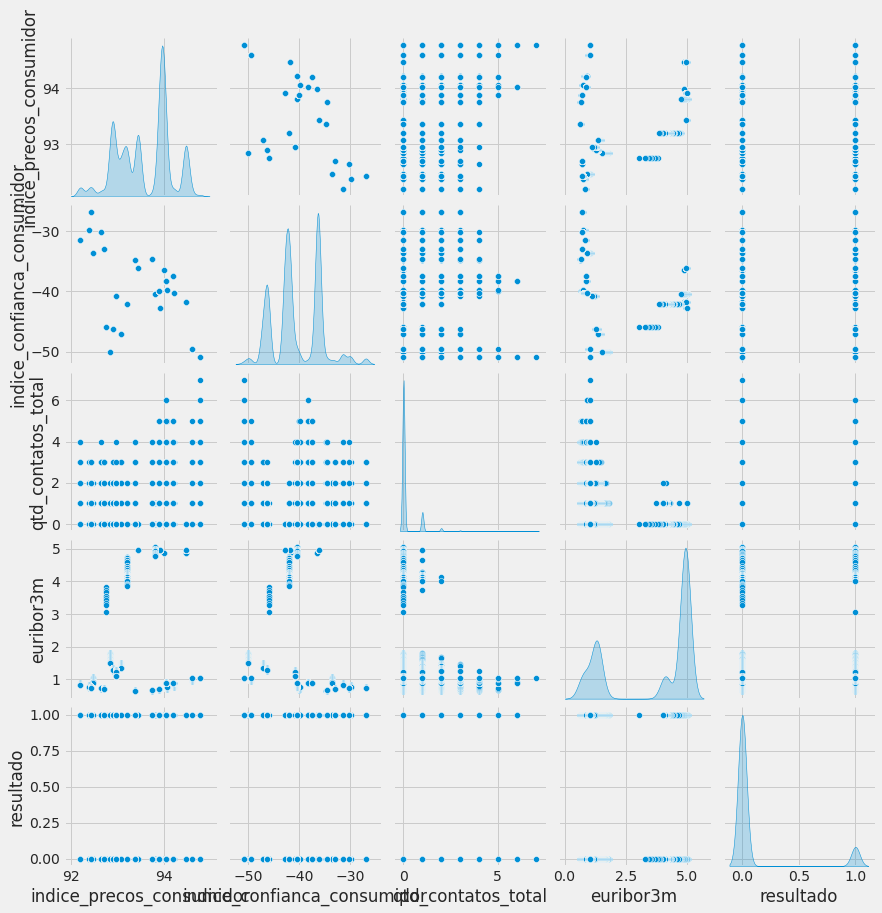

In [69]:
corr_indexes = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['indice_precos_consumidor',
                                             'indice_confianca_consumidor',
                                             'qtd_contatos_total',
                                             'euribor3m',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
corr_indexes;

**NOTES**
<br/>
There are no visible correlations between the features and the target variable.

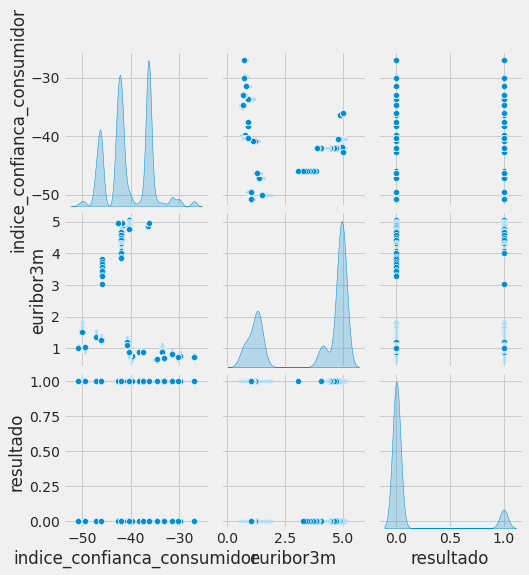

In [70]:
corr_until_inadimplente = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['indice_confianca_consumidor',
                                             'euribor3m',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
corr_until_inadimplente;

#### Better Correlations

In [74]:
def top_corr(df: pd.core.frame.DataFrame, 
             list_col: list,
             n_corr: int = 20,
             corr_method: str = 'pearson') -> pd.core.frame.Series:
    corr_top_list = df[list_col].corr(method=corr_method).abs()

    s = corr_top_list.unstack()
    sortedSeries = s.sort_values(kind="quicksort",ascending=False)
    best_correlation = sortedSeries[sortedSeries != 1.0][0:n_corr]

    print("-"*25, "TOP CORRELATED IN PAIRS", "-"*25, end='\n\n')
    return best_correlation

In [75]:
top_corr(df=df_callcenter,
         list_col=list_numerical_col)

------------------------- TOP CORRELATED IN PAIRS -------------------------



numero_empregados         euribor3m                  0.94
euribor3m                 numero_empregados          0.94
qtd_contatos_total        campanha_anterior          0.87
campanha_anterior         qtd_contatos_total         0.87
indice_precos_consumidor  euribor3m                  0.69
euribor3m                 indice_precos_consumidor   0.69
dias_ultimo_contato       campanha_anterior          0.60
campanha_anterior         dias_ultimo_contato        0.60
meio_contato              indice_precos_consumidor   0.59
indice_precos_consumidor  meio_contato               0.59
                          numero_empregados          0.52
numero_empregados         indice_precos_consumidor   0.52
                          campanha_anterior          0.51
campanha_anterior         numero_empregados          0.51
numero_empregados         qtd_contatos_total         0.50
qtd_contatos_total        numero_empregados          0.50
                          dias_ultimo_contato        0.49
dias_ultimo_co

**NOTES**
<br/>
Entre as 20 melhores correlações, não há algum caso de correlação das features com a variável target (`resultado`)

In [57]:
top_corr(df=df_resultado_0,
         list_col=list_numerical_col)

------------------------- TOP CORRELATED IN PAIRS -------------------------



numero_empregados         euribor3m                  0.947091
euribor3m                 numero_empregados          0.947091
campanha_anterior         qtd_contatos_total          0.88906
qtd_contatos_total        campanha_anterior           0.88906
euribor3m                 indice_precos_consumidor   0.729543
indice_precos_consumidor  euribor3m                  0.729543
meio_contato              indice_precos_consumidor   0.620426
indice_precos_consumidor  meio_contato               0.620426
                          numero_empregados          0.593404
numero_empregados         indice_precos_consumidor   0.593404
campanha_anterior         dias_ultimo_contato         0.46764
dias_ultimo_contato       campanha_anterior           0.46764
numero_empregados         qtd_contatos_total         0.463939
qtd_contatos_total        numero_empregados          0.463939
euribor3m                 campanha_anterior          0.455025
campanha_anterior         euribor3m                  0.455025
numero_e

In [58]:
top_corr(df=df_resultado_1,
         list_col=list_numerical_col)

------------------------- TOP CORRELATED IN PAIRS -------------------------



euribor3m                    numero_empregados             0.921716
numero_empregados            euribor3m                     0.921716
qtd_contatos_total           campanha_anterior             0.811377
campanha_anterior            qtd_contatos_total            0.811377
dias_ultimo_contato          campanha_anterior             0.711856
campanha_anterior            dias_ultimo_contato           0.711856
dias_ultimo_contato          qtd_contatos_total            0.574737
qtd_contatos_total           dias_ultimo_contato           0.574737
numero_empregados            campanha_anterior             0.510864
campanha_anterior            numero_empregados             0.510864
numero_empregados            qtd_contatos_total            0.488669
qtd_contatos_total           numero_empregados             0.488669
duracao                      euribor3m                     0.480573
euribor3m                    duracao                       0.480573
indice_confianca_consumidor  mes                

**NOTES**
<br/>
Something interesting is that `dias_ultimo_contato` and `campanha_anterior` significantly increase in correlation when the `resultado == 1`.

#### No correlations

- correlation = 0% with the feature: `resultado`
- It's features independents

In [76]:
def get_without_correlation(df, list_col, target_col):
    corr_list = df[list_col].corr().abs()

    s = corr_list.unstack()
    sorted_series = s\
                    .sort_values(kind="quicksort",ascending=True)\
                        .get(target_col)
    if sorted_series is None:
        return print('All columns have correlation with target column.')

    without_correlation = sorted_series[sorted_series < 0.01][0:-1]

    print("-"*25, "WITHOUT CORRELATED WITH TARGET", "-"*25, end='\n\n')
    print(without_correlation)
    return without_correlation.index.tolist()

In [77]:
def remove_without_corr(df: 'dataframe', list_without_corr: list) -> int:
    print(f'Columns before = {df.shape[1]}')

    for column in list_without_corr:
        del df[column]
    
    return print(f"Columns after = {df.shape[1]}")

In [78]:
list_without_corr = get_without_correlation(df = df_callcenter,
                                            list_col = list_numerical_col,
                                            target_col = 'resultado')

------------------------- WITHOUT CORRELATED WITH TARGET -------------------------

emprestimo_pessoal   0.00
dtype: float64


In [79]:
remove_without_corr(df_callcenter, list_without_corr)

Columns before = 20
Columns after = 19


In [80]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])
list_without_target_col = get_col_without_target(df=df_callcenter,
                                                 list_columns=list_columns,
                                                 target_col='resultado')

Dataframe not contains <class 'object'> columns !
<class 'list'>


---

## **Feature Importance**
I will use a **decision tree** to do feature selection.<br/>
From there, I will rank the most important features.

**NOTES:** Right now I'm just using it to find out which variables have the greatest weight in the model.

In [81]:
def get_feature_importance_df(feature_importances,
                              column_names, 
                              top_n=25):
    """
    Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances : numpy ndarray
        Feature importances computed by an ensemble 
            model like random forest or boosting
    column_names : array-like
        Names of the columns in the same order as feature 
            importances
    top_n : integer
        Number of top features
 
    Returns
    -------
    df : a Pandas data frame
    """
     
    imp_dict = dict(zip(column_names, feature_importances))
    
    # get name features sorted
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]
    
    # get values
    top_importances = [imp_dict[feature] for feature in top_features]
    
    # create dataframe with feature_importance
    df = pd.DataFrame(data={'feature': top_features, 'importance': top_importances})
    return df

In [82]:
# create model

rf = RandomForestClassifier(n_estimators=150, # numbers tree
                            max_depth=8,
                            min_samples_leaf=4,
                            max_features=0.2, # each tree utility 20% in the features
                            n_jobs=-1,
                            random_state=42)

In [83]:
# trainning model

rf.fit(df_callcenter[list_without_target_col], df_callcenter['resultado'])
features = df_callcenter[list_without_target_col].columns.values

print("---Traing Done---")

---Traing Done---


In [84]:
# get trained model (rf) and avalible the feature_importance
feature_importance = get_feature_importance_df(rf.feature_importances_, features)

# print feature_importance in the rf randomForest
display(feature_importance)

,feature,importance
0,duracao,0.32
1,numero_empregados,0.19
2,euribor3m,0.13
3,dias_ultimo_contato,0.08
4,campanha_anterior,0.06
5,indice_precos_consumidor,0.05
6,indice_confianca_consumidor,0.05
7,mes,0.03
8,idade,0.03
9,qtd_contatos_total,0.02


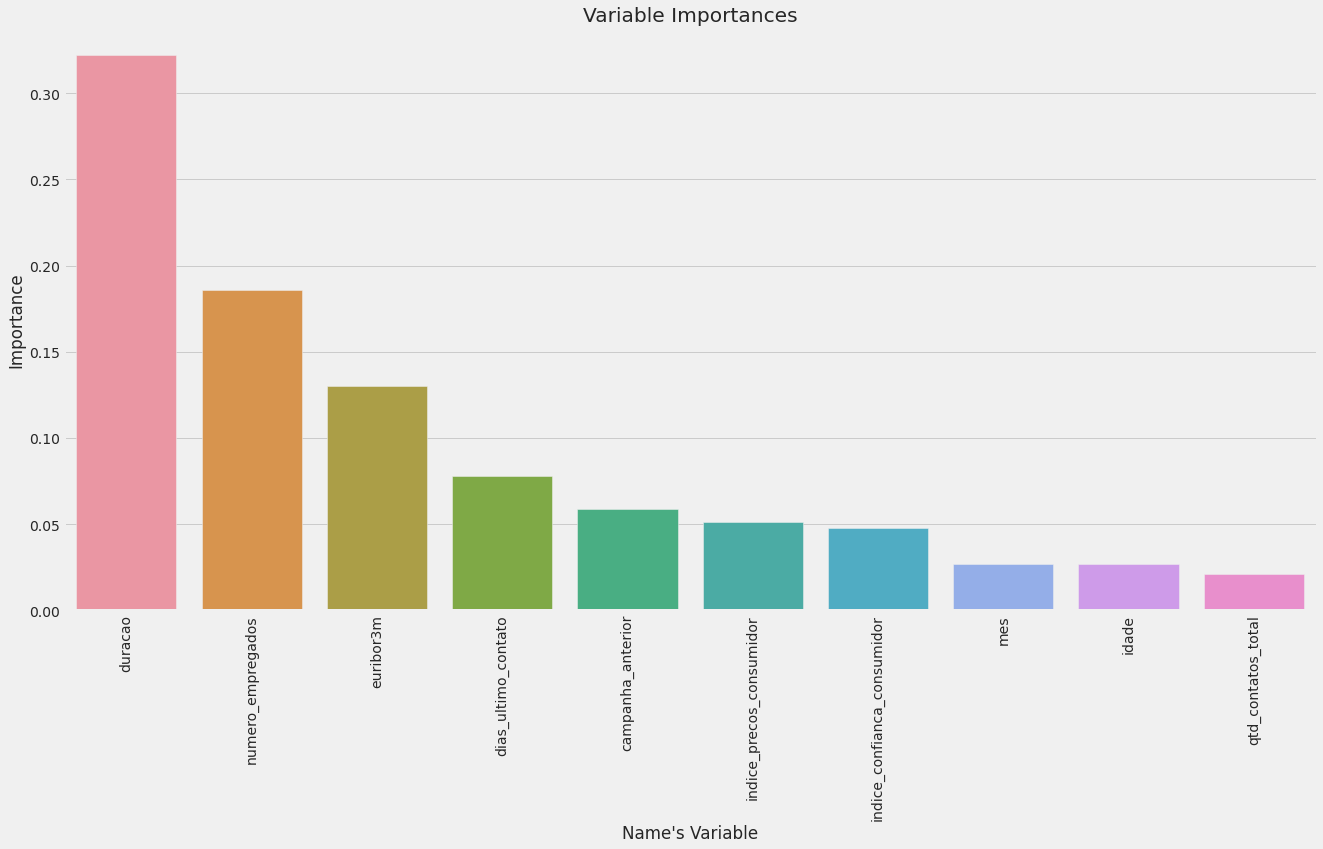

In [86]:
fig,ax = plt.subplots()
plt.xticks(rotation='vertical')

fig.set_size_inches(20,10)
sns.barplot(data=feature_importance[:10], 
            x="feature", 
            y="importance", 
            ax=ax)
ax.set(xlabel="Name's Variable",
       ylabel='Importance',
       title="Variable Importances");

<br/>

#### Elimination of Unimportant Feature
Eliminating features that are unimportant to the model will make the rest of the features more orthogonal and reduce noise.

In [87]:
def get_without_importance(df_feature_importance: pd.core.frame.DataFrame) -> list:
    list_drop_col = []
              
    cond_duracao = (df_feature_importance['importance'] < 0.005)
    df_temp = df_feature_importance[cond_duracao]
    
    list_drop_col = df_temp['feature'].tolist()
    
    print("-"*25, "FEATURE WITHOUT IMPORTANCE", "-"*25, end='\n\n')
    print(df_temp)
    return list_drop_col

In [88]:
def remove_without_importace(df: pd.core.frame.DataFrame, list_without_imp: list) -> int:
    print(f'Columns before = {df.shape[1]}')
    
    for column in list_without_imp:
        del df[column]
        
    return print(f"Columns after = {df.shape[1]}")

In [89]:
list_without_importance = get_without_importance(df_feature_importance = feature_importance)

remove_without_importace(df = df_callcenter,
                        list_without_imp = list_without_importance)

------------------------- FEATURE WITHOUT IMPORTANCE -------------------------

                  feature  importance
14           estado_civil        0.00
15  qtd_contatos_campanha        0.00
16     emprestimo_moradia        0.00
17           inadimplente        0.00
Columns before = 19
Columns after = 15


---

## **Save Clean Data**

In [90]:
def save_data_clenning(df: pd.core.frame.DataFrame,
                       path: str = 'data/cleansing/') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "saved data!"

In [91]:
save_data_clenning(df = df_callcenter,
                   path = 'data/cleansing/callcenter_marketing_clenning.csv')

'saved data!'

---